In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import os

csvfile = os.path.join("C:/", "temp", "ansel_gpio", "GPIO_RPU_RPD", "GPIO_RPU_RPD,GPIO1,Supply=ONBUF,ansel,CC=UNK.csv")


In [299]:
%matplotlib inline

In [300]:
# must set names because CSV has a variable number of columns
data_header = pd.read_csv(csvfile, sep=";", names=["field", "value"], index_col=0, error_bad_lines=False, warn_bad_lines=False)
data_header

,value
field,
CSV_VERSION,1.00
Path,P:\measurement_results\ansel\run_10.08.2016_18...
block,GPIO1
current_temp,ambient
device,ansel
devicename,ansel
imax,2.0
interface_version,0.2
pmic_imax,1.9


In [301]:
data = pd.read_csv(csvfile, sep=";", skiprows=list(range(18))+[19])
data

,supply_voltage,ohm_rpu_calc,ohm_rpd_calc,i_pmic_meas,v_pmic_meas,v_gpio_low_meas,i_pull_down_meas,v_gpio_high_meas,i_pull_up_meas
0,1.802321,207.9,208.8,0.0004,3.801233,3.202277e-07,-0.000009,1.802316,0.000009


In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
supply_voltage      1 non-null float64
ohm_rpu_calc        1 non-null float64
ohm_rpd_calc        1 non-null float64
i_pmic_meas         1 non-null float64
v_pmic_meas         1 non-null float64
v_gpio_low_meas     1 non-null float64
i_pull_down_meas    1 non-null float64
v_gpio_high_meas    1 non-null float64
i_pull_up_meas      1 non-null float64
dtypes: float64(9)
memory usage: 108.0 bytes


In [303]:
data["supply_voltage"]

0    1.802321
Name: supply_voltage, dtype: float64

In [304]:
# .loc allows label indexing
data_header.loc["script_name":"timestamp"]

,value
field,
script_name,GPIO_RPU_RPD
short_name,GPIO_RPU_RPD
temperature,ambient
time,%d.%m.%Y %H.%M.%S
timestamp,10.08.2016 18.55.15


In [305]:
# rows!
data[:]

,supply_voltage,ohm_rpu_calc,ohm_rpd_calc,i_pmic_meas,v_pmic_meas,v_gpio_low_meas,i_pull_down_meas,v_gpio_high_meas,i_pull_up_meas
0,1.802321,207.9,208.8,0.0004,3.801233,3.202277e-07,-0.000009,1.802316,0.000009


In [306]:
# segment iloc[rowrange, colrange]
# .iloc allows positional indexing
data.iloc[:, :4]

,supply_voltage,ohm_rpu_calc,ohm_rpd_calc,i_pmic_meas
0,1.802321,207.9,208.8,0.0004


In [307]:
data.iloc[0, :]

supply_voltage      1.802321e+00
ohm_rpu_calc        2.079000e+02
ohm_rpd_calc        2.088000e+02
i_pmic_meas         4.000000e-04
v_pmic_meas         3.801233e+00
v_gpio_low_meas     3.202277e-07
i_pull_down_meas   -8.668035e-06
v_gpio_high_meas    1.802316e+00
i_pull_up_meas      8.632121e-06
Name: 0, dtype: float64

In [308]:
data.iloc[0, :] > 1.5

supply_voltage       True
ohm_rpu_calc         True
ohm_rpd_calc         True
i_pmic_meas         False
v_pmic_meas          True
v_gpio_low_meas     False
i_pull_down_meas    False
v_gpio_high_meas     True
i_pull_up_meas      False
Name: 0, dtype: bool

In [309]:
# Show only columns with values > 1.5
data.loc[:, data.iloc[0, :] > 1.5]

,supply_voltage,ohm_rpu_calc,ohm_rpd_calc,v_pmic_meas,v_gpio_high_meas
0,1.802321,207.9,208.8,3.801233,1.802316


In [310]:
newrow = pd.Series([1.7, 200, 140, 0.02, 3, 5e-7, -3e-6, 2, 9e-6], index=list(data.columns))
newrow


supply_voltage      1.700000e+00
ohm_rpu_calc        2.000000e+02
ohm_rpd_calc        1.400000e+02
i_pmic_meas         2.000000e-02
v_pmic_meas         3.000000e+00
v_gpio_low_meas     5.000000e-07
i_pull_down_meas   -3.000000e-06
v_gpio_high_meas    2.000000e+00
i_pull_up_meas      9.000000e-06
dtype: float64

In [311]:
data = data.append(newrow, ignore_index=True)
data = data.append(newrow * 0.869, ignore_index=True)
data = data.append(newrow * 1.546, ignore_index=True)
data

,supply_voltage,ohm_rpu_calc,ohm_rpd_calc,i_pmic_meas,v_pmic_meas,v_gpio_low_meas,i_pull_down_meas,v_gpio_high_meas,i_pull_up_meas
0,1.802321,207.9,208.80,0.00040,3.801233,3.202277e-07,-0.000009,1.802316,0.000009
1,1.700000,200.0,140.00,0.02000,3.000000,5.000000e-07,-0.000003,2.000000,0.000009
2,1.477300,173.8,121.66,0.01738,2.607000,4.345000e-07,-0.000003,1.738000,0.000008
3,2.628200,309.2,216.44,0.03092,4.638000,7.730000e-07,-0.000005,3.092000,0.000014


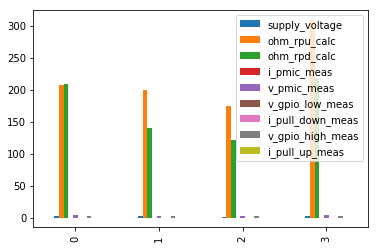

In [312]:
data.plot.bar()

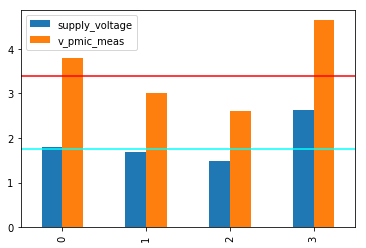

In [317]:
ax = data[["supply_voltage", "v_pmic_meas"]].plot.bar()
ax.axhline(data["supply_voltage"].median(), color='cyan', linestyle='-')
ax.axhline(data["v_pmic_meas"].median(), color='red', linestyle='-')